In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

(13, 785)
232


Text(0.5, 0, 'Variance')

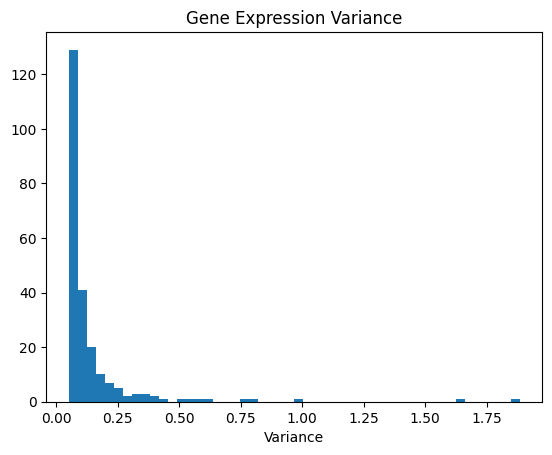

In [4]:
# Load gene epxression 
celltype='huvec'
dose='A'
df = pd.read_csv(f"data/{celltype}/cd_matrix_d{dose}.csv")

# Load curated partition, add radiation to each subset
with open(f"./data/{celltype}/cd_partition_d{dose}_new.pickle", 'rb') as f:
    custom_partition = pickle.load(f)
df_first_subset = df[custom_partition[0]]
X = df_first_subset.to_numpy()
#X = df.to_numpy()
print(X.shape)
variance = np.var(np.log1p(X),axis=0)
print(len(variance[variance>0.05]))
filtered_inds = np.where(variance>0.05)
filtered_genes = df_first_subset.columns[filtered_inds]
plt.hist(variance[variance>0.05], bins=50)
plt.title("Gene Expression Variance")
plt.xlabel("Variance")

In [5]:
print(filtered_genes)

Index(['SGK1', 'RAC2', 'STAT5A', 'YEATS2', 'SFRP1', 'SIX2', 'TLE6', 'DCBLD2',
       'PSIP1', 'ZSCAN20',
       ...
       'AMPH', 'ODC1', 'DKK1', 'ABCA1', 'TUBA4A', 'CAMK2N1', 'TFPI', 'LIMS2',
       'DNMT3B', 'PODXL2'],
      dtype='object', length=232)


(13, 232)


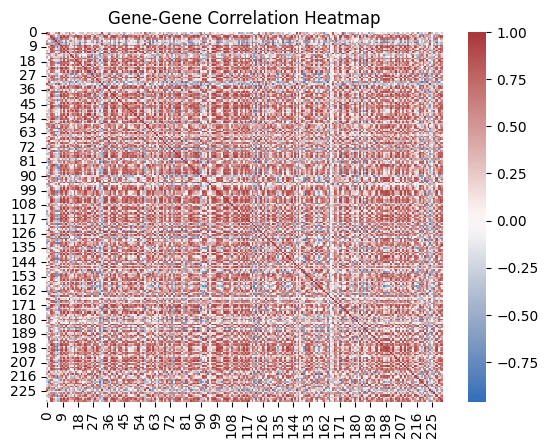

In [6]:
X_filtered = X[:,filtered_inds].squeeze()
print(X_filtered.shape)
corr = np.corrcoef(np.log1p(X_filtered).T)  # X: [samples x genes]
sns.heatmap(corr, cmap="vlag", center=0)
plt.title("Gene-Gene Correlation Heatmap")
plt.show()

(65, 144)
(56,)


Text(0.5, 1.0, 'PCA of Samples by Dose')

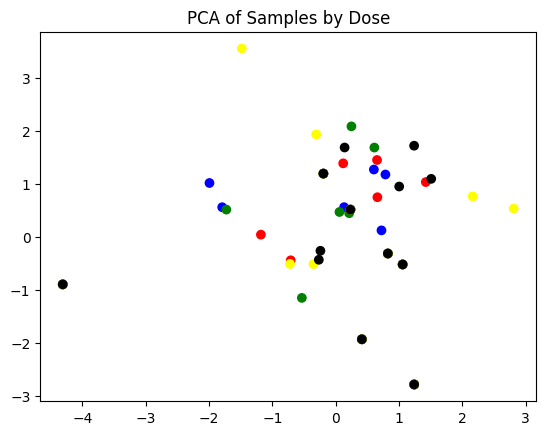

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
celltype='huvec'
doses=['A', 'B', 'C', 'D', 'E']
colors = ['red', 'blue', 'green', 'yellow', 'black']
dfs_first_subset_by_dose = []
intersection_de_genes = set(df.columns)
dose_labels = []
for i, d in enumerate(doses):
    df = pd.read_csv(f"data/{celltype}/cd_matrix_d{d}.csv")
    dose_labels+= df.shape[0]*[colors[i]]
    # Load curated partition, add radiation to each subset
    with open(f"./data/{celltype}/cd_partition_d{d}_new.pickle", 'rb') as f:
        custom_partition = pickle.load(f)
    df_first_subset = df[custom_partition[0]]
    intersection_de_genes = intersection_de_genes.intersection(set(custom_partition[0]))
    dfs_first_subset_by_dose.append(df_first_subset)
dfs_first_subset_by_dose = [d[list(intersection_de_genes)] for d in dfs_first_subset_by_dose]
df_joined =pd.concat(dfs_first_subset_by_dose, axis=0)
print(df_joined.shape)
variance = np.var(np.log1p(df_joined.to_numpy()),axis=0)
filtered_inds = np.where(variance>0.05)
print(filtered_inds[0].shape)
filtered_genes = df_joined.columns[filtered_inds]
X_doses = np.log1p(df_joined.to_numpy()[:,filtered_inds].squeeze())
X_pca = pca.fit_transform(X_doses)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dose_labels)  # use color per dose
plt.title("PCA of Samples by Dose")

/tmp/ipykernel_4057412/2135504035.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_matrix[i, j] = mutual_info_regression(X_doses[:, [i]], X_doses[:, j])
/tmp/ipykernel_4057412/2135504035.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_matrix[i, j] = mutual_info_regression(X_doses[:, [i]], X_doses[:, j])
/tmp/ipykernel_4057412/2135504035.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_matrix[i, j] = mutual_info_regression(X_doses[:, [i]], X_doses

Text(0.5, 1.0, 'Pairwise Mutual Information')

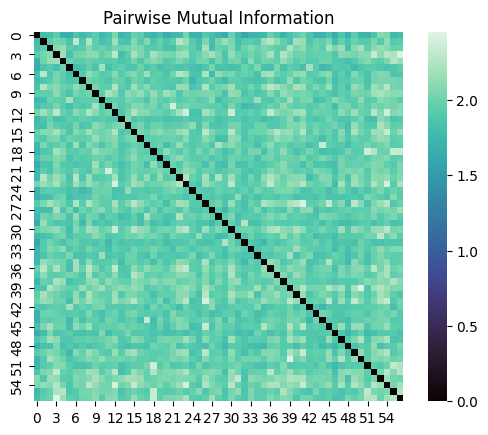

In [8]:
from sklearn.feature_selection import mutual_info_regression

mi_matrix = np.zeros((X_doses.shape[1], X_doses.shape[1]))
for i in range(X_doses.shape[1]):
    for j in range(X_doses.shape[1]):
        if i != j:
            mi_matrix[i, j] = mutual_info_regression(X_doses[:, [i]], X_doses[:, j])

sns.heatmap(mi_matrix, cmap="mako", square=True)
plt.title("Pairwise Mutual Information")

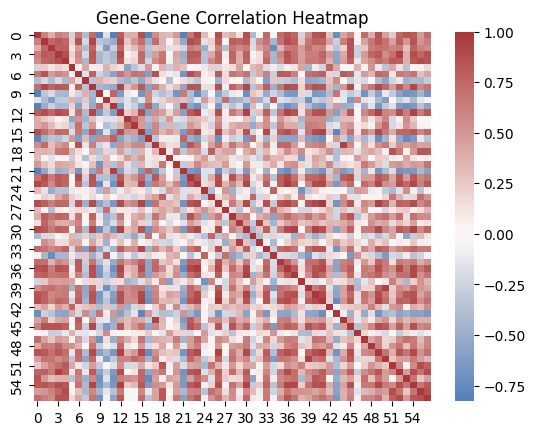

In [9]:
corr = np.corrcoef(X_doses.T)  # X: [samples x genes]
sns.heatmap(corr, cmap="vlag", center=0)
plt.title("Gene-Gene Correlation Heatmap")
plt.show()

In [10]:
print(intersection_de_genes)

{'HMGB1', 'TOMM20', 'PTPN22', 'MAP4', 'PSMD2', 'PTTG1', 'STAT6', 'SNRPB', 'TMEM47', 'HMGA1', 'BUB1', 'TUBB4B', 'TRIM59', 'CCL2', 'CCNH', 'WDR76', 'APP', 'PPIF', 'VDR', 'HSPA9', 'EGFR', 'BRCA1', 'FKBP4', 'CALR', 'PRKD1', 'TXNIP', 'SREBF2', 'HMGA2', 'AKR1B1', 'B2M', 'UBC', 'BACH1', 'CDK1', 'KPNB1', 'GSN', 'TOP1', 'NCOR2', 'S100A10', 'RRM2B', 'BUB3', 'NMT2', 'CYFIP2', 'USP1', 'RPS27L', 'POLRMT', 'RAD21', 'BBC3', 'RUNX1', 'NCL', 'GMPS', 'FOXK1', 'GADD45A', 'SAFB', 'TXN', 'CCNA2', 'G3BP1', 'PERP', 'BACE2', 'MAP1LC3B', 'LMNA', 'IGF1R', 'TYMS', 'CPSF6', 'MYLK', 'PTGS2', 'BARD1', 'TOPBP1', 'ERCC2', 'NAPA', 'RPL4', 'S100A11', 'PTK7', 'NCAPH', 'MMP2', 'HNRNPUL1', 'MELK', 'TNFRSF21', 'EIF3B', 'ADAM12', 'POLD1', 'SMC3', 'DUSP1', 'NUP155', 'HIPK3', 'COLGALT1', 'SMG7', 'MYL9', 'LAMA4', 'AIG1', 'CDKN1B', 'MGST1', 'PSMC1', 'TTLL5', 'SLC25A4', 'PSMC3', 'RPS3', 'BCAT1', 'PTBP1', 'PLK1', 'SOCS3', 'LATS2', 'FUS', 'UBE2T', 'EP400', 'RFWD3', 'ATP2A2', 'MYBBP1A', 'IRF2BP2', 'SETD7', 'PDIA3', 'PCNA', 'SREBF1'

In [6]:
# Analyse the partition for key genes
celltype="huvec"
important_genes = pd.read_csv("./data/prior_knowledge/radiation_genes.txt", sep=' ', header=None).iloc[:,0]
#important_genes = important_genes.iloc[0:10,0]
dag_gnn_important_genes = ["radiation", "BCL2A1", "FOXS1", "NUPR1", "EGR2"]
print(list(important_genes.values))
doses = ["A", "B", "C", "D", "E"]
all_data = []
for i, d in enumerate(doses):
    print(d)
    df = pd.read_csv(f"data/{celltype}/cd_matrix_d{d}.csv")
    all_data.append(df)
    with open(f"./data/{celltype}/cd_partition_d{d}_new.pickle", 'rb') as f:
        custom_partition = pickle.load(f)
    for i, comm in custom_partition.items():
        comm += ['radiation']
        if i==0:
            key_genes_in_comm= list(set(important_genes).intersection(set(comm)))#[gene for gene in important_genes if gene in comm]
            print(f"Key genes in comm {key_genes_in_comm}")
            local_df = df[comm]
            variance = np.var(np.log1p(local_df.to_numpy()),axis=0)
            filtered_inds = np.where(variance>0.05)
            filtered_genes = local_df.columns[filtered_inds]
            key_genes_in_filtered_genes = [gene for gene in key_genes_in_comm if gene in filtered_genes]
            print(f"Key genes with variance > 0.05 {key_genes_in_filtered_genes}")
            for gene, var in zip(comm, variance):
                if gene in key_genes_in_comm:
                    print(f"Key gene {gene}, variance {var}")
                if gene in dag_gnn_important_genes:
                    print(f"DAG_GNN key gene {gene}, variance {var}")
        

['TP53', 'MYC', 'FOS', 'BCL2', 'NFYB', 'E2F4', 'B2M', 'EGR2', 'CDKN1A', 'GADD45A', 'ATM', 'ATR', 'SOD2', 'GPX1', 'HMOX1', 'BAX', 'CASP3', 'ILB', 'IL6', 'IL8', 'IL33', 'TNF', 'TNFAIP3', 'TNF-alpha', 'NFKB1', 'EGR1', 'RAD51', 'MDM2', 'XPC', 'DDB2', 'TGF-beta-1', 'CXCL2', 'CXCL3', 'CXCL4', 'GDF15', 'FDXR', 'FAS', 'PTGS2', 'FGF2', 'POU5F1', 'MMP1', 'MMP3', 'DKK1', 'SERPINB2', 'IL1A', 'IL1B', 'LIF', 'MMP10', 'ATF3', 'BCL2A1', 'MT1E', 'KDM5B', 'BMP2', 'KYNU', 'LAMB3', 'ETS1']
A
Key genes in comm ['HMOX1', 'CDKN1A', 'EGR1', 'GADD45A', 'DKK1', 'BCL2A1', 'GDF15', 'MYC', 'ATF3', 'KDM5B', 'B2M', 'MDM2', 'ETS1']
Key genes with variance > 0.05 ['HMOX1', 'EGR1', 'DKK1', 'BCL2A1', 'ATF3']
Key gene ETS1, variance 0.03397466424971146
Key gene GDF15, variance 0.031196882999091617
Key gene BCL2A1, variance 1.6540653264334553
DAG_GNN key gene BCL2A1, variance 1.6540653264334553
Key gene B2M, variance 0.033180848317015746
Key gene GADD45A, variance 0.04432693571580378
Key gene MDM2, variance 0.035793523771

In [32]:
all_data_df = pd.concat(all_data)
important_genes = pd.read_csv("./data/prior_knowledge/radiation_genes.txt", sep=' ', header=None).to_numpy()

print(all_data_df.shape)
variance = np.nanvar(np.log1p(all_data_df.to_numpy()),axis=0)
for i, col in enumerate(all_data_df.columns):
    if col in important_genes: # and variance[i] > 0.05:
        print(f"Gene {col} has variance {variance[i]} across doses")
    

(65, 9115)
Gene IL1A has variance 0.09843511699150419 across doses
Gene DDB2 has variance 0.01825385791633583 across doses
Gene B2M has variance 0.046496207231662 across doses
Gene GPX1 has variance 0.03481236255255243 across doses
Gene BCL2A1 has variance 1.5974684893272608 across doses
Gene DKK1 has variance 0.18859454517938976 across doses
Gene LAMB3 has variance 0.22456299815855393 across doses
Gene MMP10 has variance 0.07073859484440793 across doses
Gene ETS1 has variance 0.04030722393909554 across doses
Gene PTGS2 has variance 0.2256930311549455 across doses
Gene MT1E has variance 0.6729251840872872 across doses
Gene KDM5B has variance 0.034691925220654604 across doses
Gene XPC has variance 0.05182564175022576 across doses
Gene BMP2 has variance 0.11234633620016223 across doses
Gene FDXR has variance 0.06061771142801767 across doses
Gene MDM2 has variance 0.050872397578367014 across doses
Gene ATM has variance 0.055718312693307015 across doses
Gene MMP1 has variance 0.13372168812

In [ ]:
import networkx as nx
celltype='huvec'
for dose in ["A", "B", "C", "D", "E"]:
    # G = nx.read_gexf(f"./data/huvec/cd_subgraph_d{dose}.gexf")
    df = pd.read_csv(f"data/{celltype}/cd_matrix_d{dose}.csv")
    variance = np.var(np.log1p(df.to_numpy()),axis=0)
    variance_map = dict(zip(df.columns, variance))
    # nx.set_node_attributes(G, variance_map, name='variance')
    # nx.write_gexf(G, f"./data/huvec/cd_var_subgraph_d{dose}.gexf")
    
    #G = nx.read_gexf(f"./data/huvec/bootstrap_graphs2/cd_dag_gnn_d{dose}.gexf")
    with open(f"./data/{celltype}/cd_partition_d{dose}_new.pickle", 'rb') as f:
        custom_partition = pickle.load(f)
    #genes = custom_partition[0] + ['radiation']
    # edge_prob = np.load(f"./data/huvec/bootstrap_graphs5/edge_prob_dag_gnn_d{dose}.npy")
    # edge_prob[edge_prob<0.5]=0
    # G = nx.from_numpy_array(edge_prob, create_using=nx.DiGraph)
    # G = nx.relabel_nodes(
    #             G,
    #             mapping=dict(zip(np.arange(len(genes)), genes)),
    #             copy=True,
    #         )
    genes = G.nodes()
    G = nx.read_gexf(f"./data/huvec/bootstrap_graphs5/cd_dag_gnn_d{dose}.gexf")
    nx.set_node_attributes(G, dict(zip(genes, [variance_map[node] for node in genes])), name='variance')
    nx.write_gexf(G, f"./data/huvec/bootstrap_graphs5/cd_var_dag_gnn_d{dose}.gexf")


